# Improving the Annotation of DeepFashion Images for Fine-grained Attribute Recognition

In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
df_attr_combined = pd.read_csv('./Anno/changed/attr_combined.csv')

In [3]:
df_category_combined = pd.read_csv('./Anno/changed/category_combined.csv')
df_attr_cloth = pd.read_csv('./Anno/changed/list_attr_cloth.txt', sep = ',') 

## 1. Fine-grained categories with sufficient training samples

In [4]:
category_frequency= df_category_combined.groupby(['category_name'])['image_name'].count()
category_frequency_sort = category_frequency.sort_values(ascending=False)
print(category_frequency_sort)

category_name
Dress          72158
Tee            36887
Blouse         24557
Shorts         19666
Tank           15429
Skirt          14773
Cardigan       13311
Sweater        13123
Jacket         10467
Top            10078
Blazer          7495
Romper          7408
Jeans           7076
Jumpsuit        6153
Leggings        5013
Joggers         4416
Hoodie          4048
Sweatpants      3048
Kimono          2294
Coat            2120
Cutoffs         1669
Sweatshorts     1106
Poncho           791
Jersey           748
Henley           716
Parka            676
Jeggings         594
Chinos           527
Culottes         486
Trunks           386
Button-Down      330
Flannel          324
Bomber           309
Anorak           160
Robe             150
Turtleneck       146
Kaftan           126
Peacoat           97
Capris            77
Onesie            70
Caftan            54
Gauchos           49
Jodhpurs          45
Sarong            32
Coverup           17
Halter            17
Name: image_name, dt

In [5]:
dict_category_frequency_sort = category_frequency_sort.to_dict()

In [6]:
lst_cate = []
for i,cate in enumerate(dict_category_frequency_sort):
    if dict_category_frequency_sort[cate] > 6000:
        print(cate)
        lst_cate.append(cate)

Dress
Tee
Blouse
Shorts
Tank
Skirt
Cardigan
Sweater
Jacket
Top
Blazer
Romper
Jeans
Jumpsuit


In [7]:
df_category_combined_improved = df_category_combined[df_category_combined['category_name'].isin(lst_cate)]

In [8]:
df_category_combined_improved.head()

,category_label,category_name,category_type,image_name
160,2,Blazer,1,img/Single-Button_Blazer/img_00000001.jpg
161,2,Blazer,1,img/Single-Button_Blazer/img_00000002.jpg
162,2,Blazer,1,img/Single-Button_Blazer/img_00000003.jpg
163,2,Blazer,1,img/Single-Button_Blazer/img_00000004.jpg
164,2,Blazer,1,img/Single-Button_Blazer/img_00000005.jpg


In [9]:
file_name = "category_combined_improved.csv"
df_category_combined_improved.to_csv("./Anno/changed/improved/"+file_name, index=None)

In [10]:
category_frequency_improved= df_category_combined_improved.groupby(['category_name'])['image_name'].count()
category_frequency_sort_improved = category_frequency_improved.sort_values(ascending=False)

## Result
Through empirical experiments with the convolutional neural network that we have used for fine-grained attribute recognition, we came to
conclusion that at least 6000 samples are required for the loss to converge.
After removing categories with not enough images,14 remained

In [11]:
category_frequency_sort_improved.plot(kind = 'bar', figsize=(15,5), fontsize = 15)

## 2. Available attributes and enough attributes

In [12]:
attr_frequency = (df_attr_combined.iloc[:,1:] == 1).sum(axis=0)
attr_frequency_sort=attr_frequency.sort_values(ascending = False)
total_img = len(df_attr_combined['image_name'])

In [13]:
attr_frequency_sort

print                      37367
floral                     24188
lace                       20434
knit                       18498
sleeve                     17828
maxi                       15990
shirt                      14920
denim                      13178
striped                    11771
chiffon                    11735
crochet                     8987
stripe                      8591
sleeveless                  7987
summer                      7616
floral print                7560
fit                         7489
cotton                      7370
leather                     7334
faux                        7243
classic                     7184
graphic                     6933
pleated                     6755
red                         6717
long sleeve                 6656
embroidered                 6621
pink                        6569
printed                     6568
bodycon                     6419
crop                        6221
skater                      6205
          

In [14]:
dict_attr_frequency_sort = attr_frequency_sort.to_dict()

In [15]:
dict_attr_frequency_sort

{'print ': 37367,
 'floral ': 24188,
 'lace ': 20434,
 'knit ': 18498,
 'sleeve ': 17828,
 'maxi ': 15990,
 'shirt ': 14920,
 'denim ': 13178,
 'striped ': 11771,
 'chiffon ': 11735,
 'crochet ': 8987,
 'stripe ': 8591,
 'sleeveless ': 7987,
 'summer ': 7616,
 'floral print ': 7560,
 'fit ': 7489,
 'cotton ': 7370,
 'leather ': 7334,
 'faux ': 7243,
 'classic ': 7184,
 'graphic ': 6933,
 'pleated ': 6755,
 'red ': 6717,
 'long sleeve ': 6656,
 'embroidered ': 6621,
 'pink ': 6569,
 'printed ': 6568,
 'bodycon ': 6419,
 'crop ': 6221,
 'skater ': 6205,
 'mini ': 6065,
 'love ': 5942,
 'abstract ': 5643,
 'muscle ': 5565,
 'v-neck ': 5493,
 'collar ': 5458,
 'skinny ': 5227,
 'pocket ': 5193,
 'mesh ': 5109,
 'button ': 5057,
 'shift ': 5025,
 'trim ': 5002,
 'wash ': 4919,
 'flare ': 4841,
 'tribal ': 4823,
 'woven ': 4744,
 'midi ': 4660,
 'drawstring ': 4588,
 'strapless ': 4358,
 'sheer ': 4287,
 'faux leather ': 4259,
 'cami ': 4151,
 'cut ': 4006,
 'hooded ': 3958,
 'rose ': 3902,


In [21]:
lst_few_attr = []
for i,attr in enumerate(dict_attr_frequency_sort):
    if (dict_attr_frequency_sort[attr]/total_img)*100 < 0.02:
        lst_few_attr.append(attr)

In [22]:
len(lst_few_attr)

46

In [23]:
df_attr_combined_improved = df_attr_combined.drop([col for col in lst_few_attr], axis = 1)

In [24]:
df_attr_combined_improved.head()

,image_name,a-line,abstract,abstract chevron,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,abstract pattern,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [25]:
file_name = "attr_combined_improved.csv"
df_attr_combined_improved.to_csv("./Anno/changed/improved/"+file_name, index=None)

In [26]:
attr_frequency_improved= (df_attr_combined_improved.iloc[:,1:] == 1).sum(axis=0)
attr_frequency_sort_improved = attr_frequency_improved.sort_values(ascending=False)

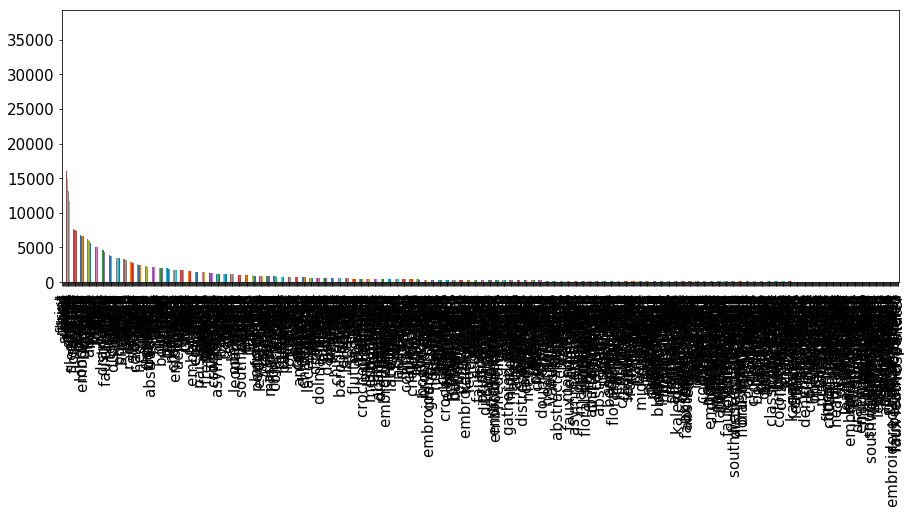

In [27]:
attr_frequency_sort_improved.plot(kind = 'bar', figsize=(15,5), fontsize = 15)

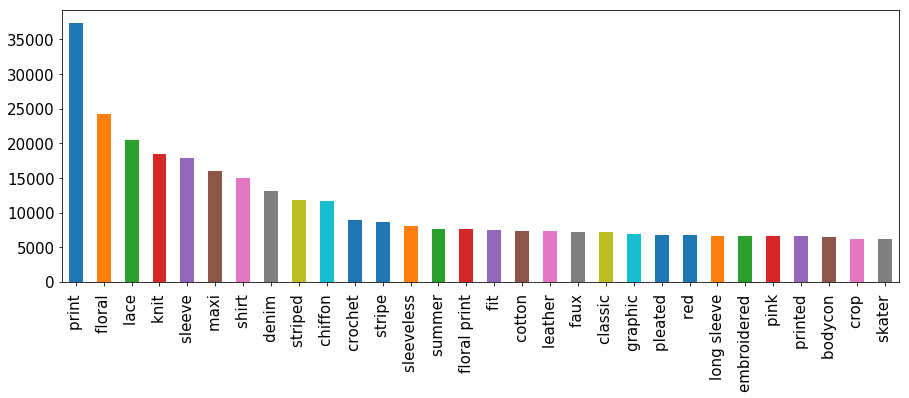

In [28]:
attr_frequency_sort_improved[:30].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

## 3. Merging duplicate annotations

Overlapping attributes contributes to the imbalance of the dataset.
We have improved the annotations by merging the visually similar attributes
and have removed the duplicates.

## compute correlation

In [29]:
lst = []
f1 = list(['printed ', 'print '])
f2 = list(['dot ', 'polka dot '])
f3 = list(['fringed ', 'fringe '])

In [30]:
f4 = list(['crop ','cropped'])

In [31]:
lst.append(f4)

In [32]:
lst.append(f1)

In [33]:
lst = [['printed ', 'print '],['fringed ', 'fringe '] ]

In [34]:
lst

[['printed ', 'print '], ['fringed ', 'fringe ']]

In [35]:
df_attr_combined_improved[f2].corr()

,dot,polka dot
dot,1.000000,0.840943
polka dot,0.840943,1.000000


In [36]:
df_attr_combined_improved[f1].corr()

,printed,print
printed,1.000000,0.013522
print,0.013522,1.000000


In [37]:
df_attr_combined_improved[f3].corr()

,fringed,fringe
fringed,1.000000,0.071619
fringe,0.071619,1.000000


In [38]:
df_attr_combined_improved.insert(1, 'printed_m', ((df_attr_combined_improved['printed '] == 1) | (df_attr_combined_improved['print '] == 1)).astype(int).replace(0, -1))

In [39]:
df_attr_combined_improved.head()

,image_name,printed_m,a-line,abstract,abstract chevron,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [40]:
df_attr_combined_improved.drop(['printed ', 'print '], axis=1, inplace=True)

In [41]:
def mergeColumns(col1, col2) :
    df_attr_combined_improved.insert(1, col1+'_m', ((df_attr_combined_improved[col1] == 1) | (df_attr_combined_improved[col2] == 1)).astype(int).replace(0, -1))
    df_attr_combined_improved.drop([col1, col2], axis=1, inplace=True)

In [42]:
mergeColumns('fringed ', 'fringe ')

In [43]:
df_attr_combined_improved.head()

,image_name,fringed _m,printed_m,a-line,abstract,abstract chevron,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [44]:
df_attr_combined_improved['fringed _m']

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
289192   -1
289193   -1
289194   -1
289195   -1
289196   -1
289197   -1
289198   -1
289199   -1
289200   -1
289201   -1
289202   -1
289203   -1
289204   -1
289205   -1
289206   -1
289207   -1
289208   -1
289209   -1
289210   -1
289211   -1
289212   -1
289213   -1
289214   -1
289215   -1
289216   -1
289217   -1
289218   -1
289219   -1
289220   -1
289221   -1
Name: fringed _m, Length: 289222, dtype: int32

In [45]:
df2 = pd.DataFrame({
                    'C': pd.Series([1, 1, -1, -1]),
                    'D': pd.Series([1, -1, 1, -1]),
}
    )

In [46]:
df2

,C,D
0,1,1
1,1,-1
2,-1,1
3,-1,-1


In [47]:
(df2['C'] == 1) | (df2['D'] == 1)

0     True
1     True
2     True
3    False
dtype: bool

In [48]:
def mergeColumns1(col1, col2) :
    df2.insert(1, col1+'_m', ((df2[col1] == 1) | (df2[col2] == 1)).astype(int).replace(0, -1))
    df2.drop([col1, col2], axis=1, inplace=True)

In [49]:
mergeColumns1('C', 'D')

In [50]:
df2

,C_m
0,1
1,1
2,1
3,-1


In [51]:
def mergeColumns2(lst_col) :
    df2.insert(1, col1+'_m', ((df2[col1] == 1) | (df2[col2] == 1)).astype(int).replace(0, -1))
    df2.drop([col1, col2], axis=1, inplace=True)

In [52]:
def calculateOR(lst_col):
    for col in lst_col:
        #print(col)
        col_b = 

SyntaxError: invalid syntax (<ipython-input-52-be67e30259b9>, line 4)

In [53]:
calculateOR(['A', 'B', 'C'])

NameError: name 'calculateOR' is not defined